<a href="https://colab.research.google.com/github/snmjack/505-olympics-mini-project/blob/master/Colab's_convolution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\n Reached 99% accuracy so terminating ")
      self.model.stop_training = True
      
callbacks = mycallback()

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = 'softmax')])
                                 

In [0]:
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [24]:
model.fit(x_train, y_train, epochs=5, callbacks = [callbacks])

Epoch 1/5
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.1077 - acc: 0.9669
Epoch 2/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.0384 - acc: 0.9880
Epoch 3/5
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0246 - acc: 0.9922
Epoch 4/5
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0181 - acc: 0.9942
Epoch 5/5
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0137 - acc: 0.9958


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 415us/sample - loss: 0.0264 - acc: 0.9927


In [26]:
print(test_acc)

0.9927


**Visualizing the Convolutions and Pooling**
This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [28]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


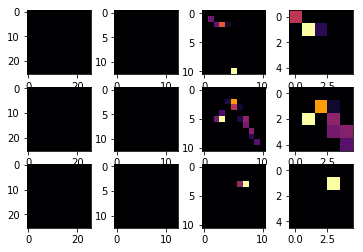

In [38]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## **Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time**

In [39]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = 'softmax')])
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=5, callbacks = [callbacks])
test_loss, test_acc = model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

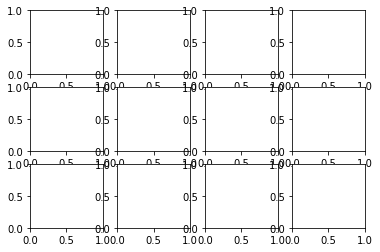

In [29]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)

In [0]:
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

In [0]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [0]:
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0, : , : , CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0, : , : , CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, : , : , CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

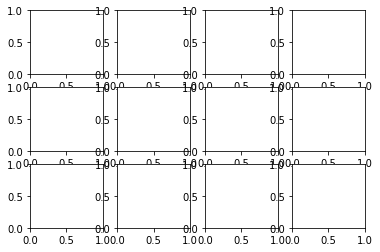

In [36]:
f, axarr = plt.subplots(3,4)

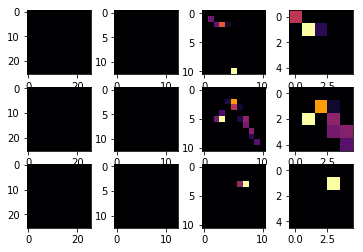

In [37]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)